# Kernel herding examples
The aim of this notebook is to provide simple examples to apply kernel herding on multivariate random inputs with or without a dependency structure.

In [1]:
%matplotlib inline

In [2]:
import openturns as ot
import otkerneldesign as otkd
from plotools import *

In [3]:
from matplotlib import rc, rcParams, style
style.use('default')
rcParams['text.usetex'] = True
#rcParams['text.latex.unicode'] = True
rc('font', **{'family': 'Palatino'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=14)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size
#rc('figure', titlesize='xx-large')# Set the font size of the figure title

## Independent bivariate random mixture

In [4]:
# Random input variable definition
unifrom = ot.Uniform(0., 1.)
distribution = ot.ComposedDistribution([unifrom] * 2)

In [5]:
dimension = distribution.getDimension()
size = 20
# Monte Carlo design
mc_design = distribution.getSample(size)
# Kernel definition
theta = 0.05
ker_list = [ot.MaternModel([theta], [1.0], 2.5)] * dimension
kernel = ot.ProductCovarianceModel(ker_list)
# Kernel herding design
kh = otkd.KernelHerding(
    kernel=kernel,
    candidate_set_size=2 ** 12,
    distribution=distribution
)
kh_design = kh.select_design(size)

In [6]:
# Tensorized kernel herding design
kht = otkd.KernelHerdingTensorized(
    kernel=kernel,
    distribution=distribution,
    candidate_set=kh._candidate_set
)
kht_design = kht.select_design(size)

In [7]:
d = DrawFunctions()
def draw_candidates(candidate_sample, title='Design of experiments'):
    fig = plt.figure(figsize=(8, 8))
    plt.title(title, fontsize=20)
    plt.xlabel("$x_0$", fontsize=20)
    plt.ylabel("$x_1$", fontsize=20)
    plt.scatter(candidate_sample[:, 0], candidate_sample[:, 1], alpha=0.1, label='candidate points ($N={}$)'.format(len(candidate_sample)), color='C7')
    plt.legend(loc='best')
    return fig

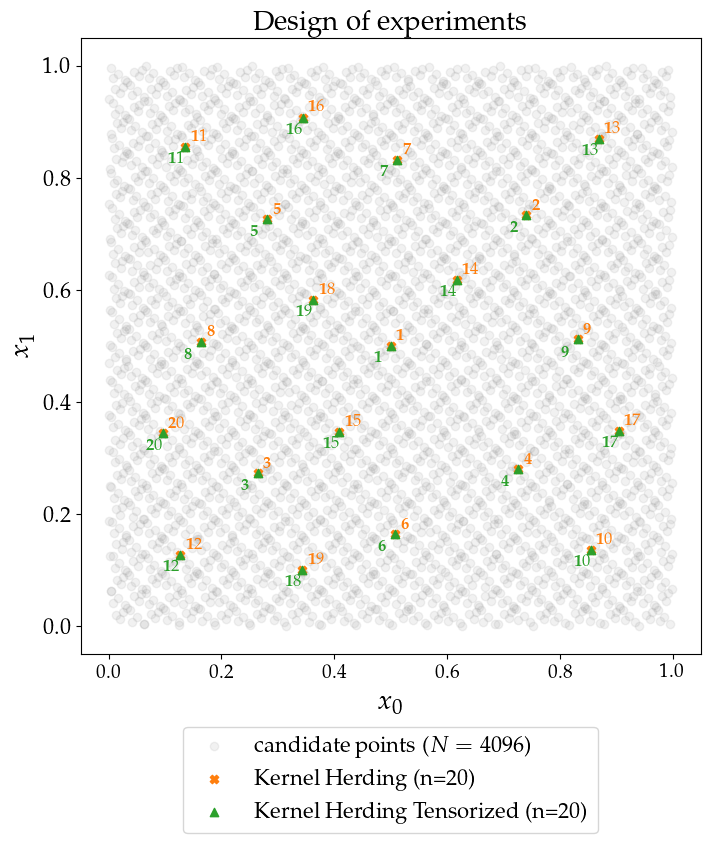

In [8]:
#fig = d.draw_2D_controur('Sampling a bivariate random mixture', None, distribution)
fig = draw_candidates(kh._candidate_set);
#plt.scatter(mc_design[:, 0], mc_design[:, 1], label='Monte Carlo (n={})'.format(size), marker='o', alpha=0.5)
plt.scatter(kh_design[:, 0], kh_design[:, 1], label='Kernel Herding (n={})'.format(size), marker='X', color='C1')
plt.scatter(kht_design[:, 0], kht_design[:, 1], label='Kernel Herding Tensorized (n={})'.format(size), marker='^', color='C2')

for i in range(len(kh_design)):
    plt.text(kh_design[i][0] + 0.01, kh_design[i][1] + 0.01, r"$\textbf{}$".format(i + 1), weight="bold", fontsize=12, color='C1')
    plt.text(kht_design[i][0] - 0.03, kht_design[i][1] - 0.03, r"$\textbf{}$".format(i + 1), weight="bold", fontsize=12, color='C2')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center');

In [9]:
candidate_sample = kh._candidate_set
kh_target_potentials = kh._target_potential
kht_target_potentials = np.array(kht._target_potential)
target_potentials_error = np.abs(kh_target_potentials - kht_target_potentials) / kh_target_potentials

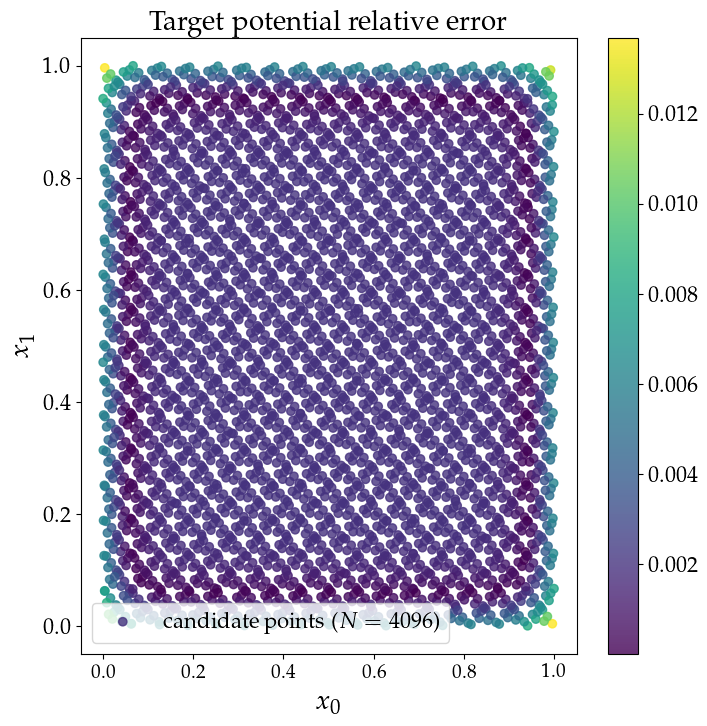

In [10]:
from matplotlib import colors
fig = plt.figure(figsize=(8, 8))
plt.title("Target potential relative error", fontsize=20)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$", fontsize=20)
plt.scatter(
    candidate_sample[:, 0],
    candidate_sample[:, 1], 
    label='candidate points ($N={}$)'.format(len(candidate_sample)),
    alpha=0.8,
    c=target_potentials_error, 
    cmap='viridis', 
    #norm=colors.LogNorm()
    )
plt.legend(loc='best')
plt.colorbar();

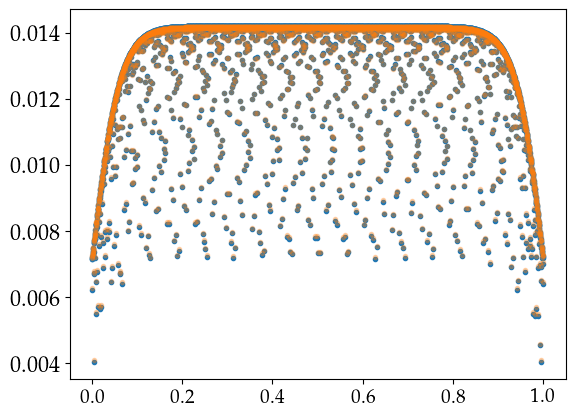

In [11]:
plt.scatter(candidate_sample[:, 0], kh_target_potentials, marker='.')
plt.scatter(candidate_sample[:, 0], kht_target_potentials, color='C1', marker='.', alpha=0.3);

## 1D study 

In [12]:
distribution = unifrom
dimension = distribution.getDimension()

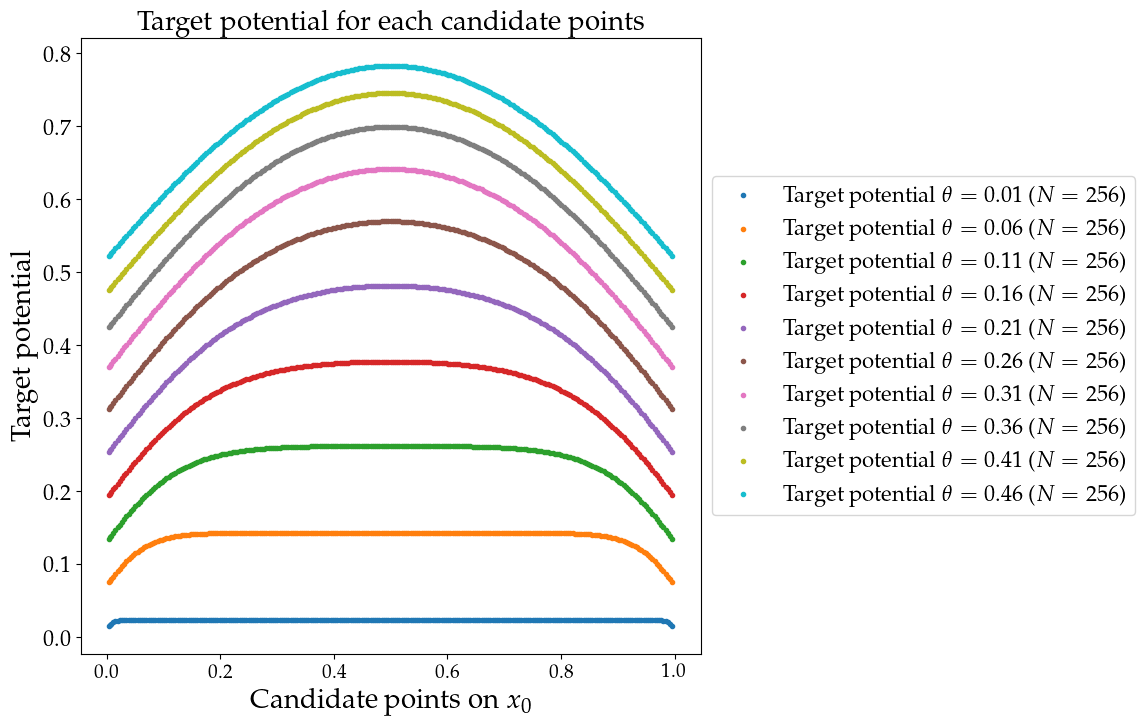

In [13]:

fig = plt.figure(figsize=(8, 8))
plt.title("Target potential for each candidate points", fontsize=20)
plt.xlabel("Candidate points on $x_0$", fontsize=20)
plt.ylabel("Target potential", fontsize=20)
for col, theta_i in enumerate(np.arange(0.01, .5, 0.05)):
    theta_i = round(theta_i, 3)
    # Kernel definition
    ker_list = [ot.MaternModel([theta_i], [1.0], 2.5)] * dimension
    kernel = ot.ProductCovarianceModel(ker_list)
    # Kernel herding design
    kh = otkd.KernelHerding(kernel=kernel, candidate_set_size=2 ** 8, distribution=distribution)
    candidate_sample = kh._candidate_set
    kh_target_potentials = kh._target_potential
    plt.scatter(candidate_sample[:, 0], kh_target_potentials, 
        label='Target potential $\\theta={}$ ($N={}$)'.format(theta_i, len(candidate_sample)),
        marker='.',
        color='C' + str(col)
        )
plt.legend(bbox_to_anchor=(1., 0.5), loc='center left');